In [1]:
#import dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [3]:
# Load the data
data = pd.read_csv(r'C:\Users\BT\Desktop\Complete-data.csv')

#top 5 rows data
data.head()

,Landslide,Aspect,Curvature,Earthquake,Elevation,Flow,Lithology,NDVI,NDWI,Plan,Precipitation,Profile,Slope
0,0,3,3,2,2,2,1,4,2,2,3,3,2
1,0,1,5,2,3,1,1,4,2,5,5,2,2
2,0,3,4,3,2,2,4,3,2,4,5,2,2
3,0,1,3,3,3,5,1,2,4,3,5,3,3
4,0,5,4,2,1,4,1,2,4,3,3,1,4


In [4]:
# Data Manipulation: Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Landslide        0
Aspect           0
Curvature        0
Earthquake       0
Elevation        0
Flow             0
Lithology        0
NDVI             0
NDWI             0
Plan             0
Precipitation    0
Profile          0
Slope            0
dtype: int64


In [5]:
# Summary statistics
summary_statistics = data.describe()
print("\nSummary Statistics:\n", summary_statistics)


Summary Statistics:
          Landslide       Aspect    Curvature   Earthquake    Elevation  \
count  1212.000000  1212.000000  1212.000000  1212.000000  1212.000000   
mean      0.500000     2.962046     2.977723     2.102310     2.436469   
std       0.500206     1.147378     1.099658     0.669812     1.242686   
min       0.000000     1.000000     1.000000     1.000000     1.000000   
25%       0.000000     2.000000     2.000000     2.000000     1.000000   
50%       0.500000     3.000000     3.000000     2.000000     2.000000   
75%       1.000000     4.000000     4.000000     3.000000     3.000000   
max       1.000000     5.000000     5.000000     3.000000     5.000000   

              Flow    Lithology         NDVI         NDWI         Plan  \
count  1212.000000  1212.000000  1212.000000  1212.000000  1212.000000   
mean      2.338284     1.948845     3.042904     2.773927     3.059406   
std       1.112686     1.424345     1.239246     1.299830     1.057287   
min       1.000

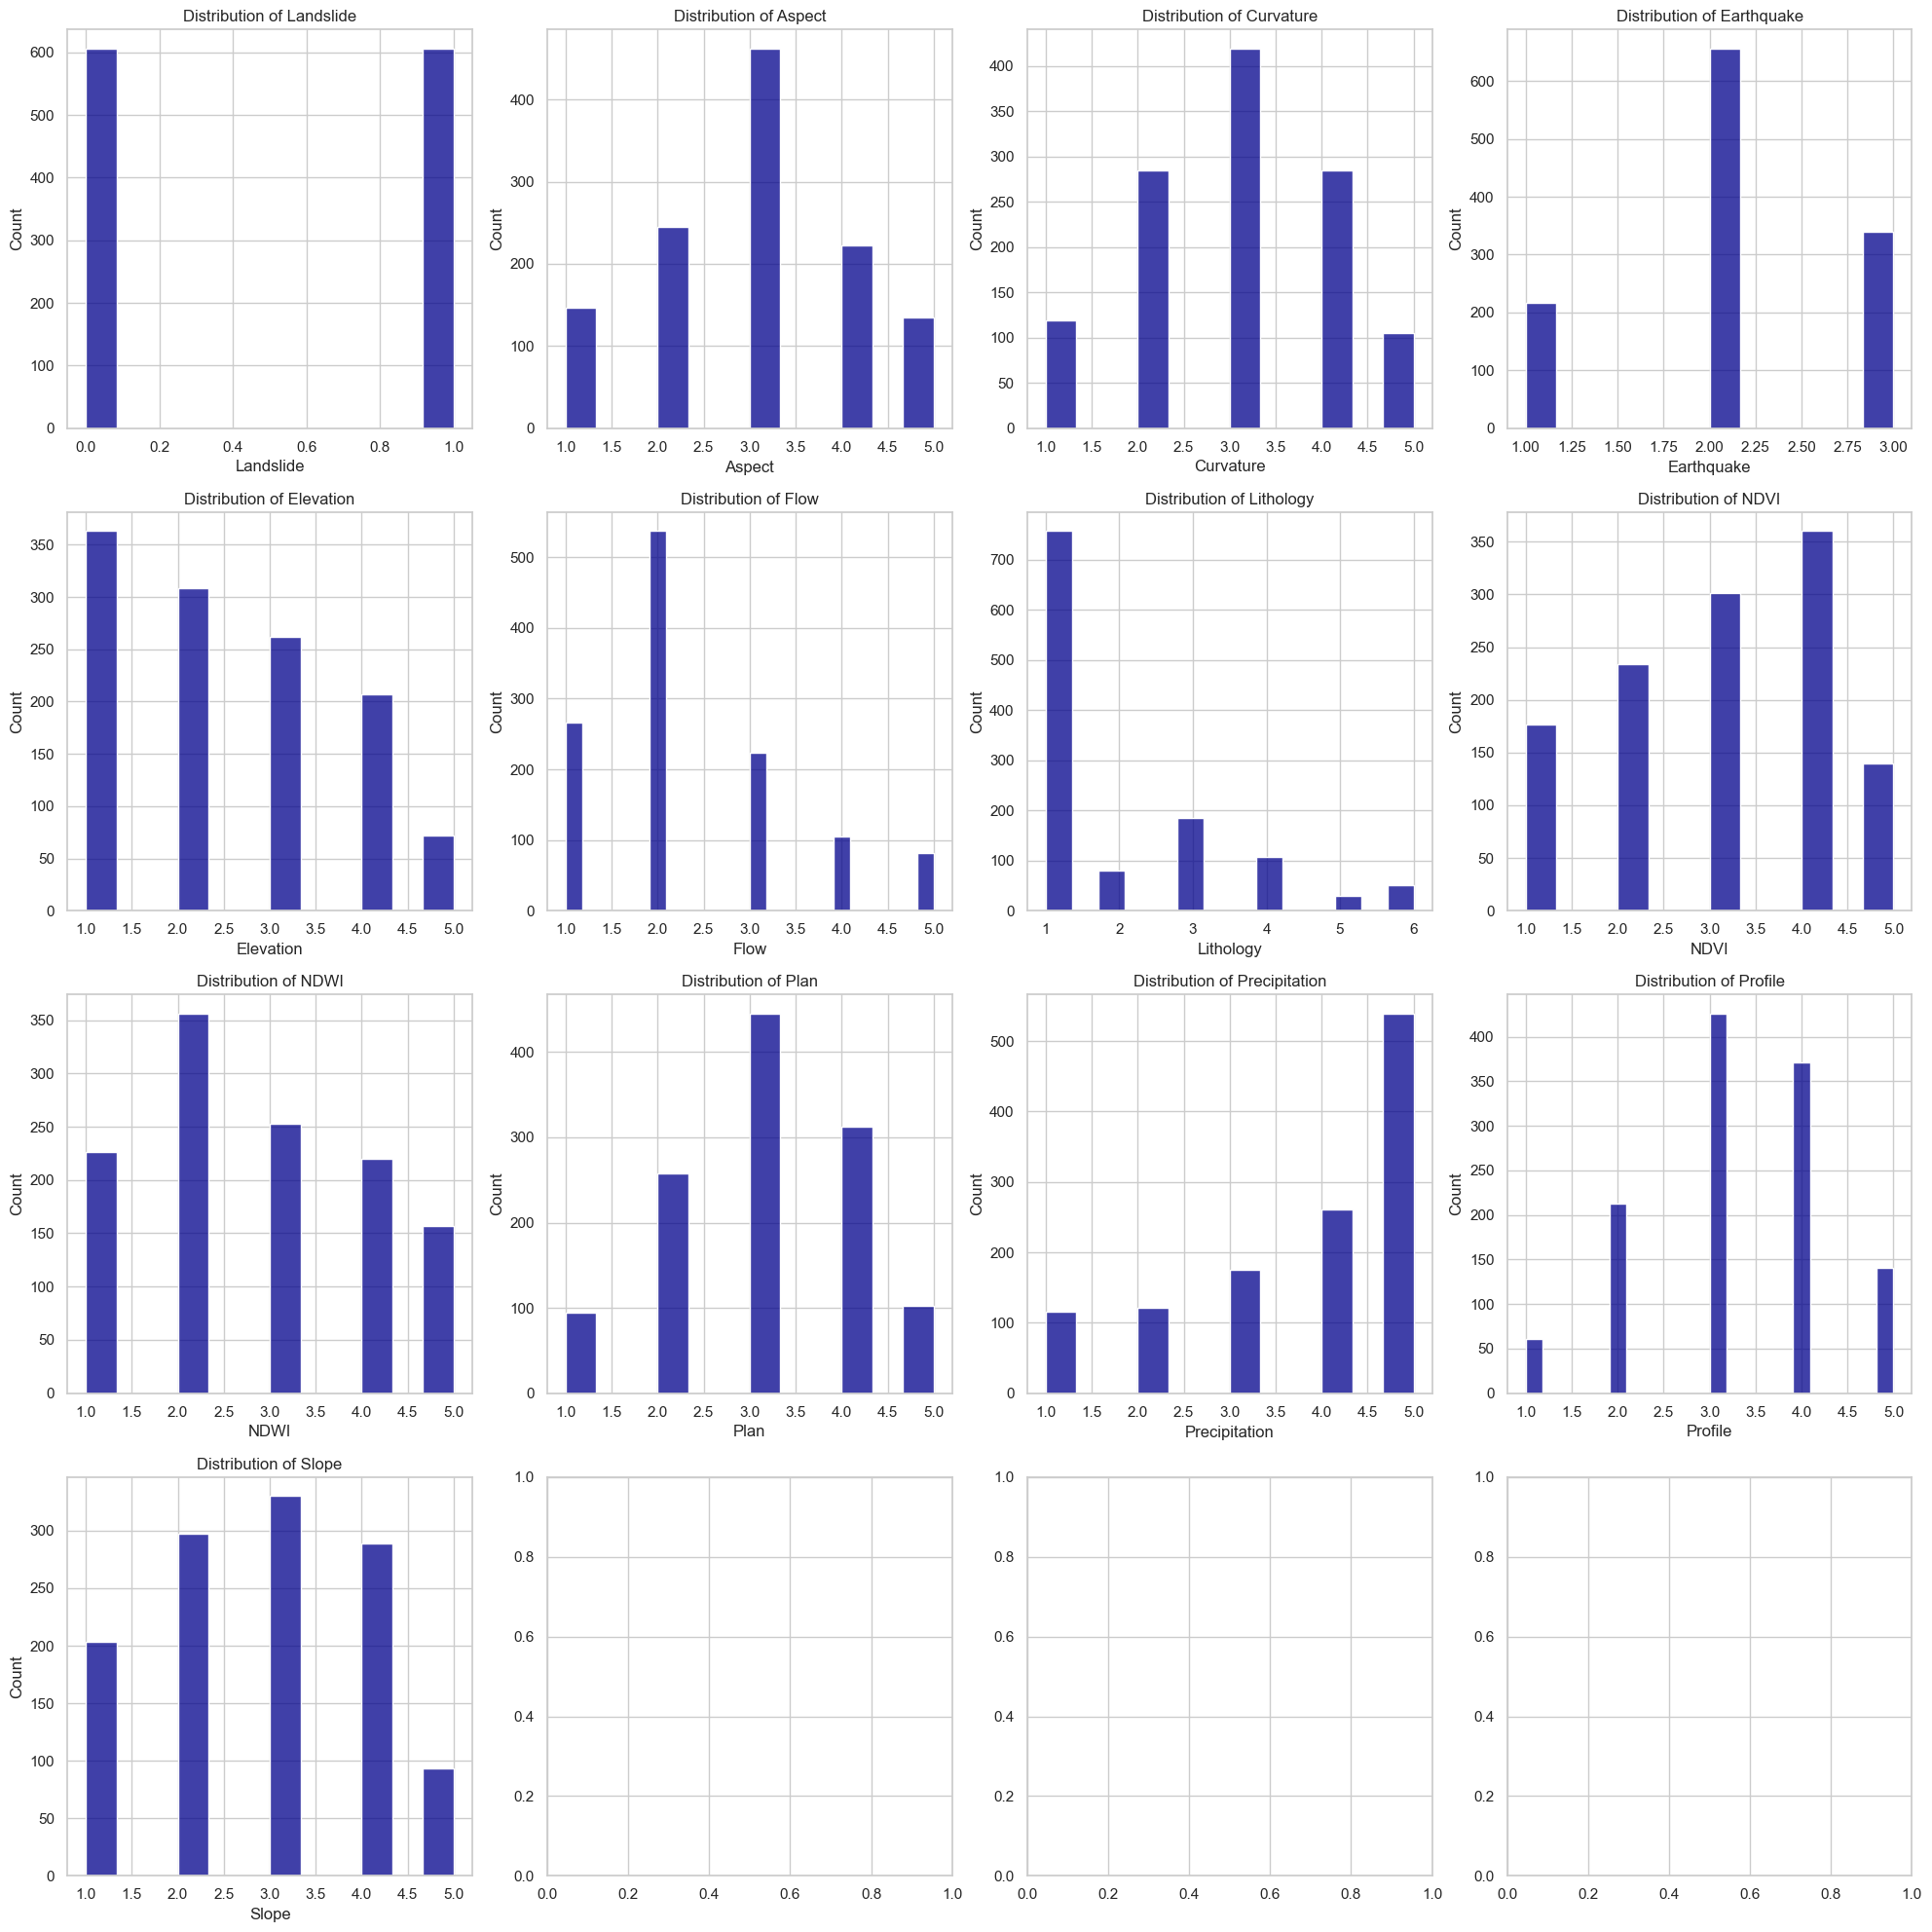

In [12]:
sns.set(style="whitegrid")
fig, axes= plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    sns.histplot(data[col], kde=False, ax=axes[i], color="darkblue")
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

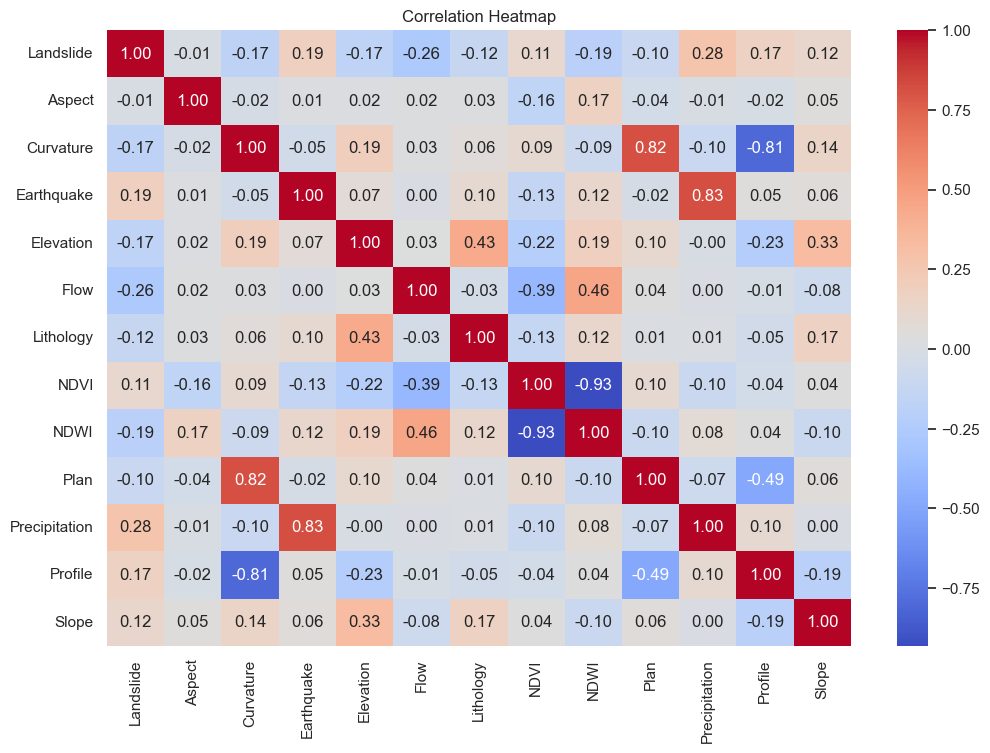


Correlation with Landslide:
 Landslide        1.000000
Precipitation    0.280490
Earthquake       0.187313
Profile          0.169928
Slope            0.123029
NDVI             0.111900
Aspect          -0.008633
Plan            -0.103052
Lithology       -0.120538
Elevation       -0.168049
Curvature       -0.173393
NDWI            -0.194317
Flow            -0.261124
Name: Landslide, dtype: float64


In [13]:
# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

print("\nCorrelation with Landslide:\n", correlation_matrix["Landslide"].sort_values(ascending=False))


In [14]:
# Data Modeling: Split data into training and testing sets
X = data.drop(columns=["Landslide"])
y = data["Landslide"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [15]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [16]:
# Predictions
y_pred = model.predict(X_test)

In [17]:
# Model Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Confusion Matrix:
 [[138  58]
 [ 35 133]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75       196
           1       0.70      0.79      0.74       168

    accuracy                           0.74       364
   macro avg       0.75      0.75      0.74       364
weighted avg       0.75      0.74      0.74       364




AUC Score: 0.7906037414965986


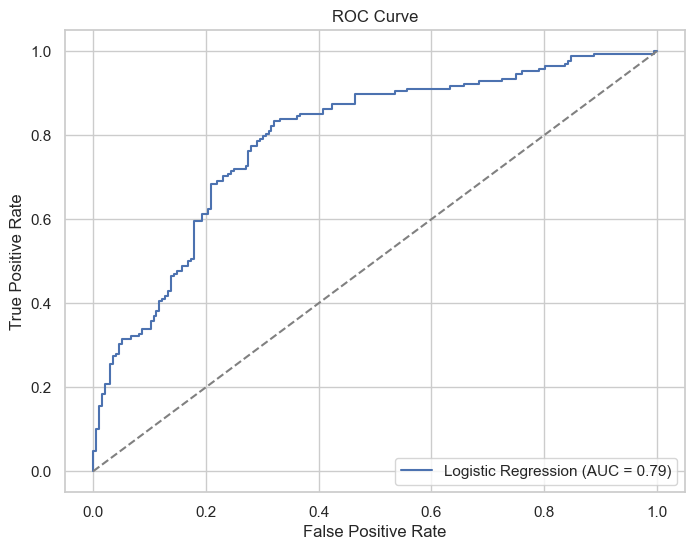

In [18]:
# ROC Curve and AUC Score
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print("\nAUC Score:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()